In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import gym
sns.set()

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees
df = pd.read_csv('/content/drive/MyDrive/RL/garments_worker_productivity.csv', header=0)
df['date'] = pd.to_datetime(df['date'])
df.set_index("date", inplace=True)
df.fillna(0, inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [14]:
scaler = preprocessing.MinMaxScaler()
X = df.drop(['quarter', 'department', 'day', 'team','actual_productivity'], axis=1).values
X = scaler.fit_transform(X)
y = df['actual_productivity']
y = scaler.fit_transform(y.values.reshape(-1, 1))

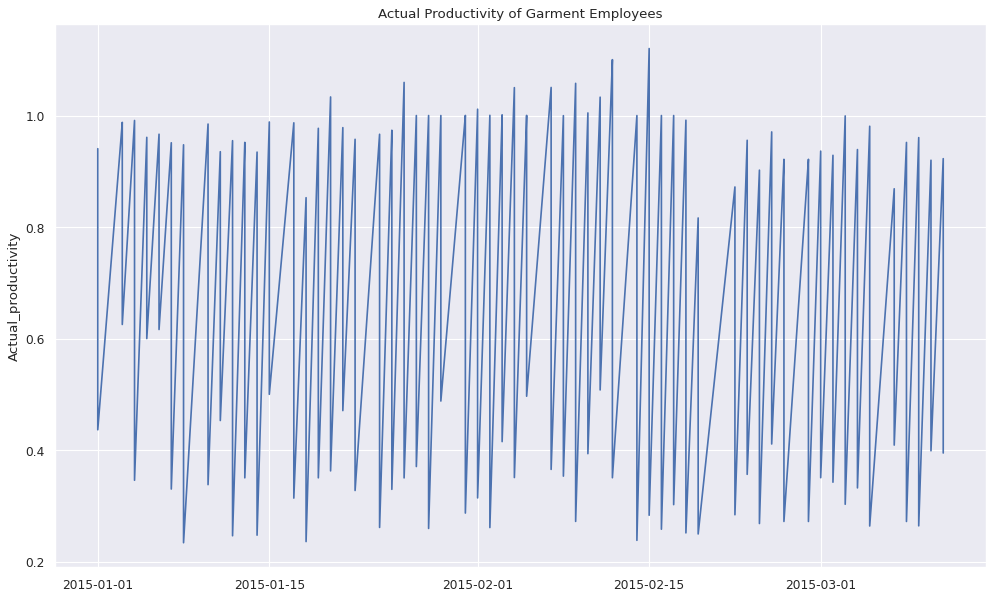

In [5]:
plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
plt.title("Actual Productivity of Garment Employees")
plt.ylabel('Actual_productivity')
plt.plot(df['actual_productivity']);

In [6]:
def design_matrix_U(X, J):
  N = X.shape[0]
  kmeans_results =  KMeans(n_clusters=J, random_state=0).fit(X)
  U = np.zeros((N, J))
  for i in range(N):
    for j in range(J):
      U[i][j] = np.linalg.norm(X[i] - kmeans_results.cluster_centers_[j])
  return U

def w_LLS(U, y):
  w = (np.linalg.inv(U.T @ U)) @ U.T @ y
  return w
def sgd(U, y_target, NberOfIter, learn_rate):
  loss_history = np.zeros((NberOfIter, 1))
  w_iter = np.random.randn(U.shape[1], 1)
  for iter in range(NberOfIter):
    index_randn = random.randint(0, U.shape[0] - 1)
    u_sample = np.reshape(U[index_randn, :], (U[index_randn, :].shape[0], 1))
    y_sample = y_target[index_randn, :]
    y_pred = u_sample.T @ w_iter
    w_iter = w_iter - learn_rate * u_sample * (y_pred - y_sample)
    loss_history[iter] = np.linalg.norm(U @ w_iter - y_target) 
  return w_iter, loss_history

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
J = 20
learn_rate = 0.04
max_iter = len(X_train)
U = design_matrix_U(X_train, J)
loss = np.zeros((max_iter - 1, 1))
w = np.zeros((U.shape[1], 1))

w, loss = sgd(U, y_train, max_iter, learn_rate)

Text(0, 0.5, 'Error')

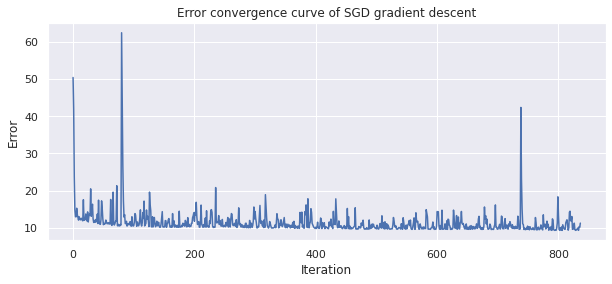

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(range(len(loss)), loss)
ax.set_title("Error convergence curve of SGD gradient descent")
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")

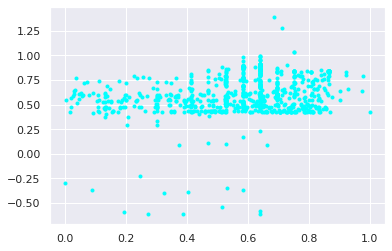

In [17]:
y_rbf_sgd = np.dot(U, w)
plt.plot(y_train, y_rbf_sgd, '.', Color='cyan')

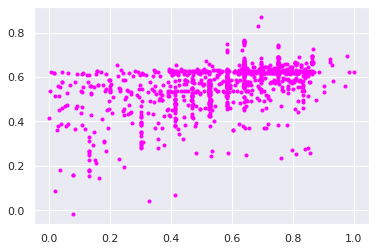

In [9]:
w = (np.linalg.inv(X.T @ X)) @ X.T @ y
yh_lin = X @ w
plt.plot(y, yh_lin, '.', Color='magenta')

5.89904293125227 5.611928364829131


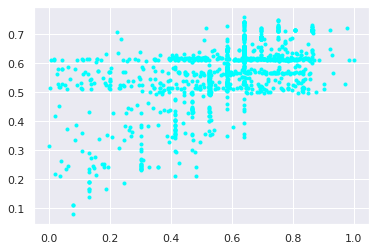

In [10]:
J = 20;
kmeans = KMeans(n_clusters=J, random_state=0).fit(X)
sig = np.std(X)
N = X.shape[0]
# Design matrix
U = design_matrix_U(X, J)
# predict and plot
w = np.dot((np.linalg.inv(np.dot(U.T, U))), U.T) @ y
yh_rbf = np.dot(U,w)
plt.plot(y, yh_rbf, '.', Color='cyan')
print(np.linalg.norm(y-yh_lin), np.linalg.norm(y-yh_rbf))